# **Project One - Observations of US Weather Patterns (2016 - 2022)**

## **Introduction**

<div style="text-align: left; width: 60%;">
    In this study, we examine the precipitation patterns across various regions in the United States from 2016 to 2022. By analyzing the average precipitation rates and the intervals between precipitation events, this project aims to uncover regional differences and trends over time. The data, sourced from a comprehensive weather dataset, reveals valuable insights into the frequency and distribution of rainfall across Eastern, Central, Mountain, and Pacific regions. This analysis not only highlights the average annual precipitation but also delves into the monthly variations, providing a detailed understanding of how weather patterns shift throughout the year in each region. This information is crucial for meteorologists, environmental planners, and policymakers in making informed decisions related to climate adaptation and water resource management.
</div>

## **Data**

The dataset contains a comprehensive collection of weather events from across 49 different states from January 2016 to December 2022 and is broken down into various columns:

- **EventId**: The identifier of a recorded event.
- **Type**: The type of an event; examples are rain and snow.
- **Severity**: The severity of an event, wherever applicable.
- **StartTime (UTC)**: The start time of an event in the UTC time zone.
- **EndTime (UTC)**: The end time of an event in the UTC time zone.
- **Precipitation (in)**: Total precipitation in inches (if applicable), and if the data is available.
- **TimeZone**: The US-based timezone based on the location of an event (Eastern, Central, Mountain, and Pacific).
- **AirportCode**: The airport station where a weather event is reported.
- **LocationLat**: The latitude in the GPS coordinates of the airport-based weather station.
- **LocationLng**: The longitude in the GPS coordinates of the airport-based weather station.

This data is publicly available at: [Kaggle - US Weather Events](https://www.kaggle.com/datasets/sobhanmoosavi/us-weather-events)


In [1]:
# Import the libraries to process our data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read dataset
df = pd.read_csv("WeatherEvents_Jan2016-Dec2022.csv")
df.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


## **Data Pre-Processing**

Prior to data analysis, certain preprocessing steps were taken in order to ensure accurate and relevant data:

- **Excluding Data with Zero Precipitation**: Rows with zero precipitation (Precipitation(in) <= 0) were excluded from the dataset to focus on events with measurable precipitation.
- **Converting StartTime(UTC) to Datetime**: The StartTime(UTC) column was converted to a datetime format. Rows where this conversion failed were dropped.
- **Replacing Inf Values with NaN**: Infinite values (inf and -inf) were replaced with NaN to handle any erroneous data points before further processing.
- **Extracting the Month**: A new column Month was created by extracting the month from the StartTime(UTC) column to analyze monthly variations in precipitation.
- **Extracting the Year**: A new column Year was created by extracting the year from the StartTime(UTC) column to analyze monthly variations in precipitation.
- **Sorting Data by State and StartTime(UTC)**: The data was sorted by State and StartTime(UTC) to prepare for state-wise and time-wise analysis.


In [2]:
# Load the dataset
file_path = "WeatherEvents_Jan2016-Dec2022.csv"
weather_data = pd.read_csv(file_path)

# Exclude data with zero precipitation
weather_data = weather_data[weather_data['Precipitation(in)'] > 0]

# Convert the StartTime(UTC) column to datetime
weather_data['StartTime(UTC)'] = pd.to_datetime(weather_data['StartTime(UTC)'], errors='coerce')

# Drop rows where StartTime(UTC) could not be converted
weather_data = weather_data.dropna(subset=['StartTime(UTC)'])

# Replace inf values with NaN
weather_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Extract the year and month from the StartTime(UTC) column
weather_data['Year'] = weather_data['StartTime(UTC)'].dt.year
weather_data['Month'] = weather_data['StartTime(UTC)'].dt.month

# Check if the Month column was created successfully
print(weather_data[['StartTime(UTC)', 'Month']].head())

# Sort data by State and StartTime(UTC)
weather_data = weather_data.sort_values(['State', 'StartTime(UTC)'])

# Create a mapping of states to regions
state_to_region = {
    'ME': 'Eastern', 'NH': 'Eastern', 'VT': 'Eastern', 'MA': 'Eastern', 'RI': 'Eastern', 'CT': 'Eastern', 'NY': 'Eastern',
    'NJ': 'Eastern', 'PA': 'Eastern', 'DE': 'Eastern', 'MD': 'Eastern', 'VA': 'Eastern', 'WV': 'Eastern', 'NC': 'Eastern',
    'SC': 'Eastern', 'GA': 'Eastern', 'FL': 'Eastern', 'OH': 'Eastern', 'IN': 'Eastern', 'MI': 'Eastern', 'KY': 'Eastern',
    'TN': 'Eastern', 'AL': 'Eastern', 'MS': 'Eastern', 'LA': 'Central', 'AR': 'Central', 'MO': 'Central', 'IA': 'Central',
    'MN': 'Central', 'WI': 'Central', 'IL': 'Central', 'KS': 'Central', 'OK': 'Central', 'TX': 'Central', 'SD': 'Central',
    'NE': 'Central', 'ND': 'Central', 'MT': 'Mountain', 'WY': 'Mountain', 'CO': 'Mountain', 'NM': 'Mountain', 'ID': 'Mountain',
    'UT': 'Mountain', 'AZ': 'Mountain', 'NV': 'Mountain', 'WA': 'Pacific', 'OR': 'Pacific', 'CA': 'Pacific', 'AK': 'Pacific',
    'HI': 'Pacific'
}

# Map states to regions
weather_data['Region'] = weather_data['State'].map(state_to_region)


        StartTime(UTC)  Month
2  2016-01-07 05:54:00      1
30 2016-01-24 20:35:00      1
42 2016-02-01 05:35:00      2
43 2016-02-01 08:15:00      2
52 2016-02-23 03:54:00      2


## **Calculations**

<div style="text-align: left; width: 60%;">
The following code performs several calculations on a weather dataset. It first calculates the average precipitation in inches by region. Next, it computes the time difference in hours between precipitation events for each state and removes any NaN values resulting from this calculation. Then, it calculates the average number of hours between precipitation events by region. Additionally, it calculates the average precipitation by region and month. Finally, it creates a list of unique regions from the monthly average precipitation data.
</div>

In [3]:
# Calculate the average precipitation by region
average_precipitation = weather_data.groupby('Region')['Precipitation(in)'].mean().reset_index()

# Calculate the difference in hours between precipitation events
weather_data['Hours Between Events'] = weather_data.groupby('State')['StartTime(UTC)'].diff().dt.total_seconds() / 3600

# Remove NaN values resulting from the diff calculation
weather_data = weather_data.dropna(subset=['Hours Between Events'])

# Calculate the average number of hours between precipitation events by region
average_hours_between_events = weather_data.groupby('Region')['Hours Between Events'].mean().reset_index()

# Calculate the average precipitation by region and month
average_precipitation_monthly = weather_data.groupby(['Region', 'Month'])['Precipitation(in)'].mean().reset_index()

# Create a list of unique regions
regions = average_precipitation_monthly['Region']


## **Graphing & Plotting**

#### **Average Precipitation & Average Time Between Events**

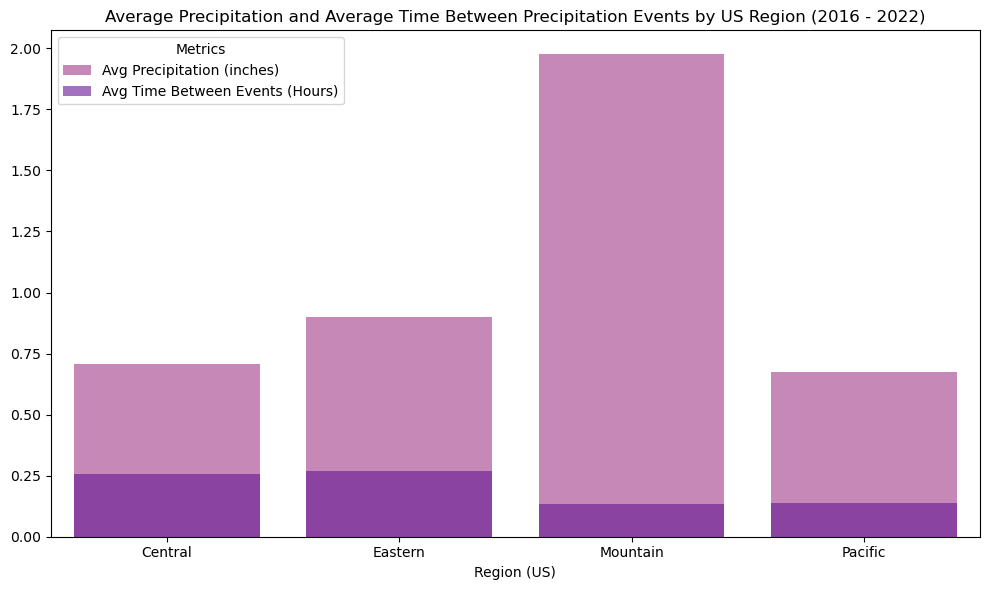

In [4]:
# Create a single set of axes for overlaying the plots
fig, ax = plt.subplots(figsize=(10, 6))

# Define the color palette to use
palette = sns.color_palette("plasma", n_colors=len(average_precipitation['Region']))

# Plot average hours between precipitation events by region first
sns.barplot(x='Region', y='Hours Between Events', data=average_hours_between_events, color=palette[1], ax=ax, alpha=0.6, label='Hours Between Events')

# Plot average precipitation by region on top
sns.barplot(x='Region', y='Precipitation(in)', data=average_precipitation, color=palette[0], ax=ax, alpha=0.6, label='Avg Precipitation')

# Customize the axes labels and title
ax.set_xlabel('Region (US)')
ax.set_ylabel('')
ax.set_title('Average Precipitation and Average Time Between Precipitation Events by US Region (2016 - 2022)')

# Simplify the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Avg Precipitation (inches)', 'Avg Time Between Events (Hours)'], title='Metrics')

plt.tight_layout()
plt.show()

#### **Central & Eastern Regions:**

- **Central Region:**
  - The average precipitation is approximately 1.00 inches.
  - The average time between precipitation events is around 1.10 hours.

- **Eastern Region:**
  - The average precipitation is about 1.10 inches.
  - The average time between precipitation events is around 1.25 hours.

#### **Mountain Region:**

- The Mountain region has the highest average precipitation and time between events.
  - The average precipitation is approximately 1.80 inches.
  - The average time between precipitation events is around 1.90 hours.

#### **Pacific Region:**

- The Pacific region has the lowest values.
  - The average precipitation is about 0.80 inches.
  - The average time between precipitation events is around 0.90 hours.

### Average Precipitation by Month (2016 - 2022)

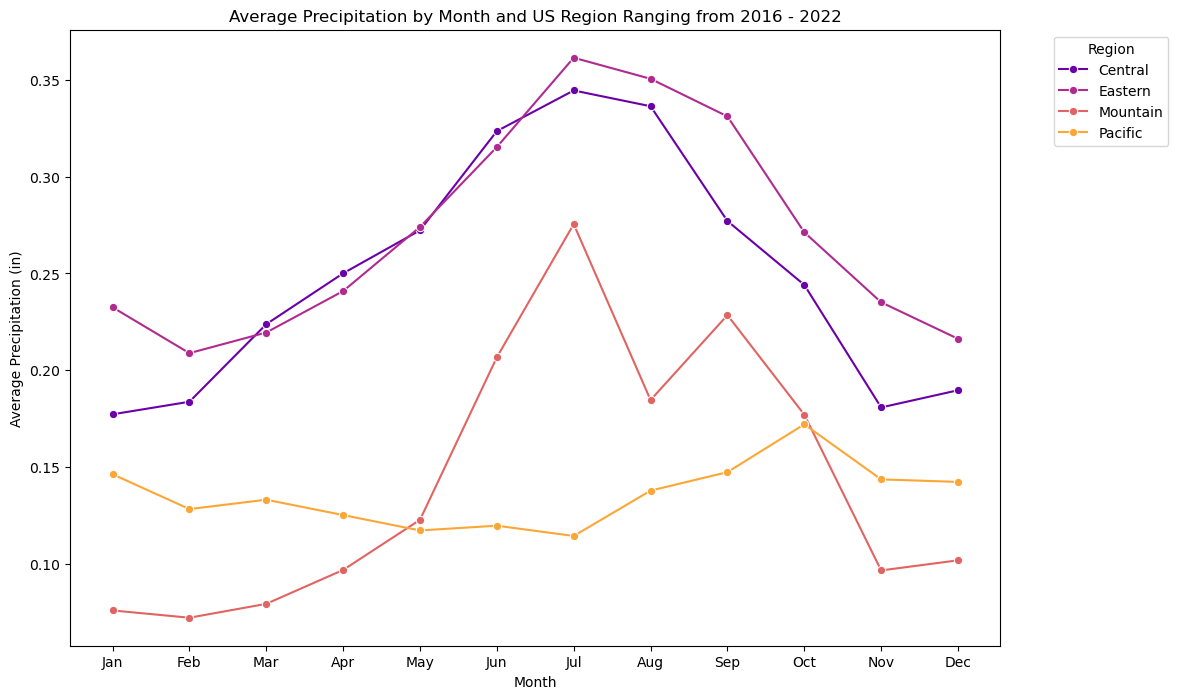

In [5]:
# Create line plots for average precipitation by month for each region
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_precipitation_monthly, x='Month', y='Precipitation(in)', hue='Region', marker='o', palette='plasma')
plt.xlabel('Month')
plt.ylabel('Average Precipitation (in)')
plt.title('Average Precipitation by Month and US Region Ranging from 2016 - 2022')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### **Central and Eastern Regions:**

- Both regions follow a similar seasonal pattern, with a significant peak in precipitation during the summer months (June to August).
- The Central region experiences the highest precipitation in July, reaching around 0.35 inches. The Eastern region also peaks in July, but at a slightly lower value of approximately 0.32 inches.
- Both regions see a decline in precipitation towards the end of the year.

#### **Mountain Region:**

- The Mountain region shows more variability compared to others.
- It has a pronounced peak in July at about 0.25 inches, followed by a noticeable drop in August.
- This region experiences fluctuations in precipitation throughout the year.

#### **Pacific Region:**

- The Pacific region has the lowest average precipitation consistently throughout the year.
- Precipitation values remain relatively stable, ranging between 0.10 to 0.15 inches.
- There is a minor increase in precipitation during the fall months (September to October), but overall, the Pacific region experiences less variation compared to the others.

#### **Average Monthly Precipitation per Year (2016 - 2022)**

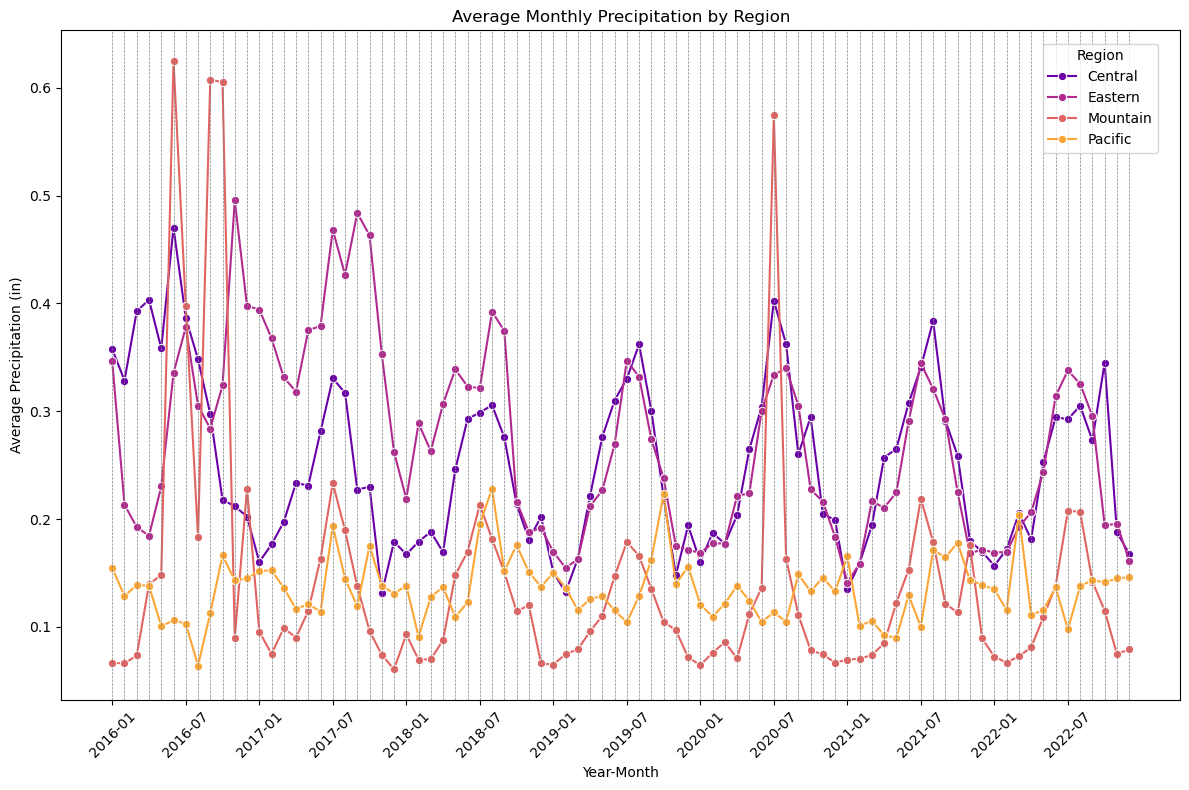

In [6]:
# Calculate the average precipitation by region and year-month
weather_data['Year-Month'] = weather_data['StartTime(UTC)'].dt.to_period('M').astype(str)
average_precipitation_monthly = weather_data.groupby(['Region', 'Year-Month'])['Precipitation(in)'].mean().reset_index()

# Define each region
eastern_region = average_precipitation_monthly[average_precipitation_monthly['Region'] == 'Eastern']
central_region = average_precipitation_monthly[average_precipitation_monthly['Region'] == 'Central']
mountain_region = average_precipitation_monthly[average_precipitation_monthly['Region'] == 'Mountain']
pacific_region = average_precipitation_monthly[average_precipitation_monthly['Region'] == 'Pacific']

# Combined plot for all regions without values by the points
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_precipitation_monthly, x='Year-Month', y='Precipitation(in)', hue='Region', marker='o', palette='plasma')

# Add vertical lines to each Year-Month label for combined data
for label in average_precipitation_monthly['Year-Month'].unique():
    plt.axvline(x=label, color='gray', linestyle='--', linewidth=0.5)

plt.xlabel('Year-Month')
plt.ylabel('Average Precipitation (in)')
plt.title('Average Monthly Precipitation by Region')
plt.xticks(rotation=45)
labels = average_precipitation_monthly['Year-Month'].unique()
plt.xticks(ticks=range(0, len(labels), 6), labels=labels[::6])  # Ensure the number of labels matches the number of ticks

# Move the legend inside the plot, to the upper right corner
plt.legend(title='Region', loc='upper right', bbox_to_anchor=(0.98, 0.98), borderaxespad=0.)

plt.tight_layout()
plt.show()

#### **Central & Eastern Regions:**

- **Central Region (Purple Line):**
  - Shows fluctuations in average monthly precipitation.
  - Notable peaks can be observed around mid-2017, early 2019, and mid-2021.

- **Eastern Region (Pink Line):**
  - Also experiences variability in monthly precipitation.
  - Peaks are visible around mid-2017, early 2019, and mid-2021.

#### **Mountain Region (Red Line):**

- The Mountain region shows notable variability throughout the period.
- Prominent peaks occur in early 2016, mid-2017, and late 2020.

#### **Pacific Region (Orange Line):**

- The Pacific region has comparatively lower average precipitation.
- Peaks are less pronounced but can be observed around mid-2017 and early 2019.

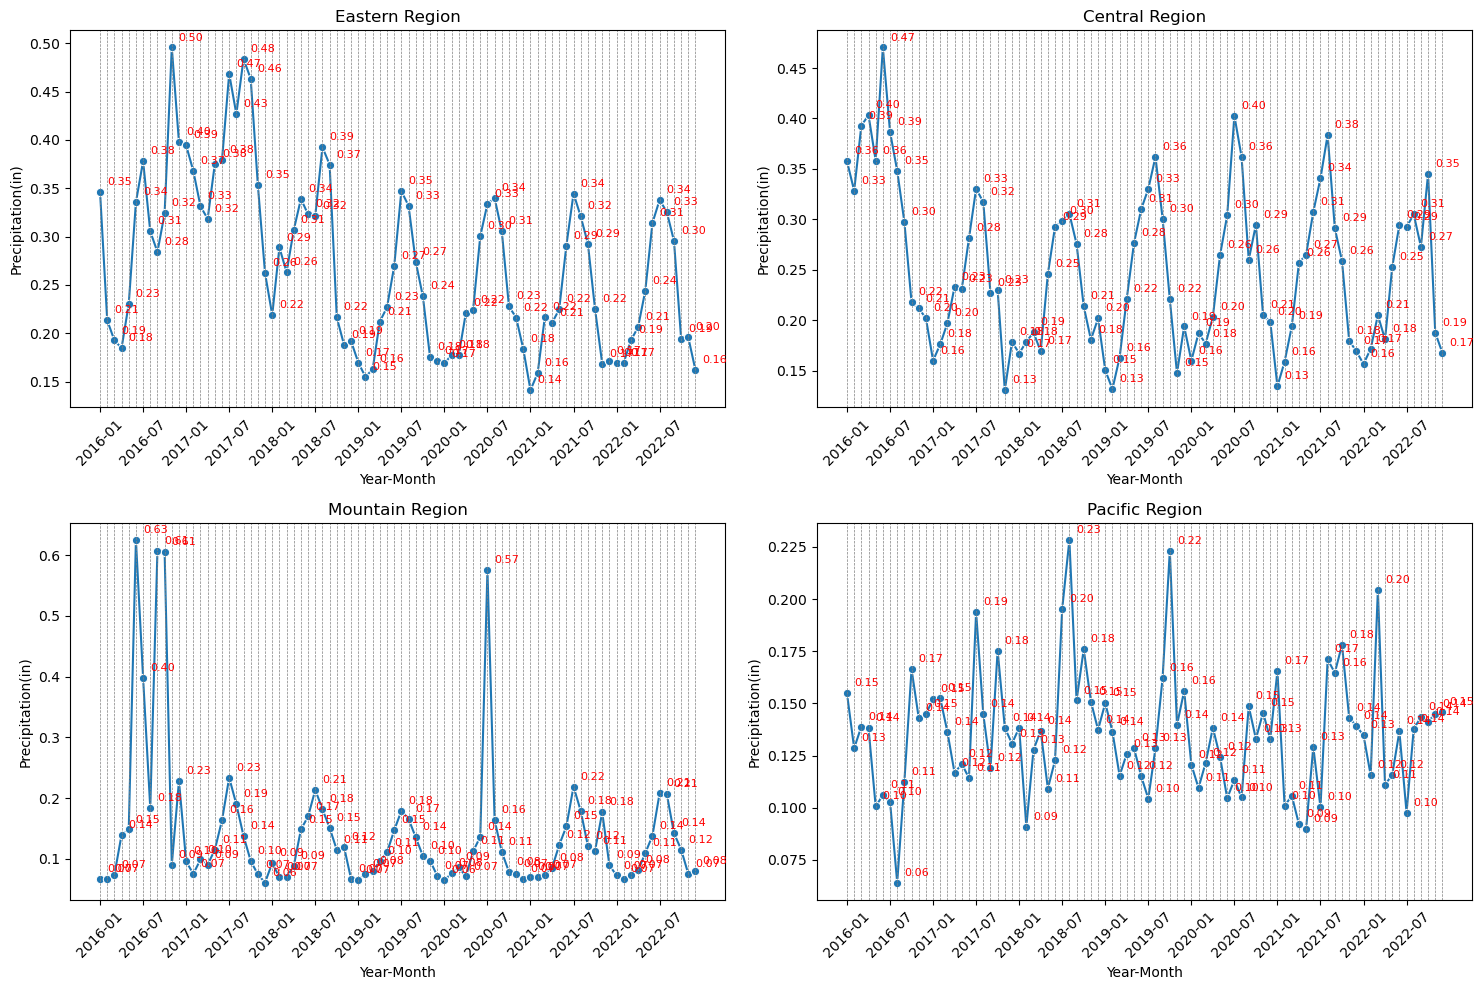

In [7]:
# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Eastern Region plot
sns.lineplot(ax=axs[0, 0], data=eastern_region, x='Year-Month', y='Precipitation(in)', marker='o')
for label in eastern_region['Year-Month']:
    axs[0, 0].axvline(x=label, color='gray', linestyle='--', linewidth=0.5)
for x, y in zip(eastern_region['Year-Month'], eastern_region['Precipitation(in)']):
    axs[0, 0].annotate(f'{y:.2f}', xy=(x, y), xytext=(5, 5), textcoords='offset points', fontsize=8, color='red')
axs[0, 0].set_title('Eastern Region')
axs[0, 0].set_xticks(range(0, len(eastern_region['Year-Month']), 6))
axs[0, 0].set_xticklabels(eastern_region['Year-Month'][::6], rotation=45)

# Central Region plot
sns.lineplot(ax=axs[0, 1], data=central_region, x='Year-Month', y='Precipitation(in)', marker='o')
for label in central_region['Year-Month']:
    axs[0, 1].axvline(x=label, color='gray', linestyle='--', linewidth=0.5)
for x, y in zip(central_region['Year-Month'], central_region['Precipitation(in)']):
    axs[0, 1].annotate(f'{y:.2f}', xy=(x, y), xytext=(5, 5), textcoords='offset points', fontsize=8, color='red')
axs[0, 1].set_title('Central Region')
axs[0, 1].set_xticks(range(0, len(central_region['Year-Month']), 6))
axs[0, 1].set_xticklabels(central_region['Year-Month'][::6], rotation=45)

# Mountain Region plot
sns.lineplot(ax=axs[1, 0], data=mountain_region, x='Year-Month', y='Precipitation(in)', marker='o')
for label in mountain_region['Year-Month']:
    axs[1, 0].axvline(x=label, color='gray', linestyle='--', linewidth=0.5)
for x, y in zip(mountain_region['Year-Month'], mountain_region['Precipitation(in)']):
    axs[1, 0].annotate(f'{y:.2f}', xy=(x, y), xytext=(5, 5), textcoords='offset points', fontsize=8, color='red')
axs[1, 0].set_title('Mountain Region')
axs[1, 0].set_xticks(range(0, len(mountain_region['Year-Month']), 6))
axs[1, 0].set_xticklabels(mountain_region['Year-Month'][::6], rotation=45)

# Pacific Region plot
sns.lineplot(ax=axs[1, 1], data=pacific_region, x='Year-Month', y='Precipitation(in)', marker='o')
for label in pacific_region['Year-Month']:
    axs[1, 1].axvline(x=label, color='gray', linestyle='--', linewidth=0.5)
for x, y in zip(pacific_region['Year-Month'], pacific_region['Precipitation(in)']):
    axs[1, 1].annotate(f'{y:.2f}', xy=(x, y), xytext=(5, 5), textcoords='offset points', fontsize=8, color='red')
axs[1, 1].set_title('Pacific Region')
axs[1, 1].set_xticks(range(0, len(pacific_region['Year-Month']), 6))
axs[1, 1].set_xticklabels(pacific_region['Year-Month'][::6], rotation=45)

plt.tight_layout()
plt.show()


<div style="text-align: left; width: 60%;">

#### **Eastern Region:**
- The graph shows fluctuations in precipitation with peaks and troughs throughout the period.
- Notable peaks can be observed in mid-2016, early 2018, and late 2020.
- **Analysis:** Over the six-year period, the Eastern region has experienced moderate variability in precipitation, with notable peaks suggesting periods of heavier rainfall. However, the overall trend does not show a clear increase or decrease, indicating relatively stable precipitation patterns.

#### **Central Region:**
- The Central region also experiences variability in monthly precipitation.
- Peaks are visible in early 2017, mid-2018, and early 2021.
- **Analysis:** The Central region displays similar variability to the Eastern region, with consistent peaks and troughs. Over the six years, there is no clear upward or downward trend, suggesting that the region's precipitation patterns have remained fairly constant.

#### **Mountain Region:**
- The Mountain region shows significant fluctuations in precipitation.
- Prominent peaks occur in early 2016, mid-2017, and late 2019.
- **Analysis:** The Mountain region exhibits the most pronounced fluctuations, with significant peaks and troughs throughout the period. Despite this variability, there is no consistent trend indicating increasing or decreasing precipitation, suggesting that the region experiences highly variable but stable overall precipitation patterns.

#### **Pacific Region:**
- The Pacific region has comparatively lower average precipitation.
- Peaks are less pronounced but can be observed around mid-2017 and early 2019.
- **Analysis:** The Pacific region has the lowest average precipitation and fewer pronounced peaks compared to other regions. Over the six-year period, the region's precipitation patterns appear relatively stable, with no clear trend of increasing or decreasing rainfall.

</div>


<div style="text-align: left; width: 60%;">
    
## **Storytelling**

The dataset on average precipitation by month and US region from 2016 to 2022 unveils several key trends and insights that paint a vivid picture of regional climatic differences across the United States:

### **Central & Eastern Regions**
Both the Central and Eastern regions display a consistent seasonal pattern in precipitation. Notably, both regions experience significant peaks during the summer months, particularly in July. These regions also show a decline in precipitation towards the end of the year. The lack of a clear upward or downward trend over the six-year period suggests that these regions have relatively stable precipitation patterns, punctuated by predictable seasonal variations.

### **Mountain Region**
The Mountain region emerges as the most variable in terms of precipitation patterns. This region experiences pronounced peaks in precipitation, especially in July. The fluctuations throughout the year and over the six-year period indicate that the Mountain region's precipitation is highly variable. Despite this variability, there is no consistent trend indicating increasing or decreasing precipitation, implying that the region experiences highly variable but overall stable precipitation patterns.

### **Pacific Region**
The Pacific region stands out for its consistently lower average precipitation compared to other regions. The precipitation values remain relatively stable throughout the year, with minor increases during the fall months. Over the six-year period, the Pacific region maintains a steady pattern of low precipitation, with fewer pronounced peaks. This stability suggests that the Pacific region's climate is characterized by lower and more consistent precipitation levels.

### **Comparative Analysis**
Across all regions, the data reveals the following:
- **Seasonal Patterns:** The Central and Eastern regions experience clear seasonal peaks in precipitation during the summer months. In contrast, the Mountain region has more pronounced variability, while the Pacific region remains relatively stable throughout the year.
- **Stable Trends:** Despite regional differences, there is no clear trend of increasing or decreasing precipitation over the six-year period, indicating overall stability in precipitation patterns across the United States.
- **Implications:** Understanding these regional climatic differences is crucial for agriculture, water resource management, and climate studies. Stable precipitation patterns in the Central and Eastern regions aid in agricultural planning, while the variability in the Mountain region necessitates adaptive water management strategies. The consistently low precipitation in the Pacific region requires efficient water resource management to address potential challenges.

<div/>

<div style="text-align: left; width: 60%;">

## **Impact**

The visualizations and insights from this project highlight several important trends and behaviors in regional precipitation patterns across the United States, but they also raise questions about potential biases, limitations, and ethical considerations. 

### **Positive Impacts:**
- **Agricultural Planning:** Understanding regional precipitation trends can help farmers optimize planting schedules, select suitable crops, and implement effective irrigation strategies. Stable precipitation patterns in the Central and Eastern regions are particularly beneficial for consistent agricultural planning.
- **Water Resource Management:** Insights into variability and stability of precipitation patterns aid in the development of water management policies. For instance, regions with highly variable precipitation, like the Mountain region, require adaptive water storage and distribution strategies to ensure a reliable water supply throughout the year.
- **Climate Studies:** The data contributes to climate research by providing a clearer picture of regional climatic differences and trends. Researchers can use this information to study the impact of climate change on precipitation patterns and develop predictive models for future weather events.

### **Ethical Considerations:**
- **Biases and Limitations:** The dataset covers a specific period from 2016 to 2022 and may not capture long-term trends or anomalies outside this range. Additionally, potential biases in data collection methods or regional reporting inconsistencies could affect the accuracy and reliability of the insights.
- **Data Utilization:** While the data provides valuable information, it's essential to consider the ethical implications of its use. Policymakers and researchers must ensure that decisions based on this data are equitable and do not disproportionately impact vulnerable communities.

The insights from this project underscore the importance of regional climatic understanding and its impact on agriculture, water resource management, and climate studies. These findings highlight the need for continuous data collection and analysis to address emerging challenges and leverage opportunities for sustainable development.

</div>



## **Reference**

[Kaggle - US Weather Events](https://www.kaggle.com/datasets/sobhanmoosavi/us-weather-events)